# Graph with multiple inputs 
### We're going to learn how to handle multiple inputs in the form of a list
- Define a slightly more complex AgentState
- Create a processing node that performs operations based on a list given to it.
- Set up a LangGraph that processes and outputs the computed results
- Invoke the graph with structured inputs and retrieve outputs

In [2]:
from typing import Dict, TypedDict, List # import List for the List datastructure
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

Building a processing node:

In [18]:
def process_values(state: AgentState) -> AgentState:
    """This node multiple different inputs and returns the sum of values and also concatenates the name"""
    print(state) # lets try printing the state before the action is performed
    state['result'] = "Hi, " + state['name'] + " your sum is: " + str(sum(state['values']))
    print(state) # then print the state after its updated
    return state

Initialise and compile the StateGraph

In [19]:
graph = StateGraph(AgentState)

graph.add_node("processing node", process_values)
graph.set_entry_point("processing node")
graph.set_finish_point("processing node")

app = graph.compile()

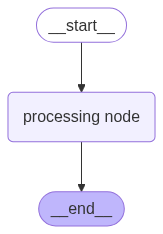

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Now test the graph (invoke it)

In [21]:
answer = app.invoke({'values':[1,2,3,4,5], 'name': "Dhruv"})
answer['result']

{'values': [1, 2, 3, 4, 5], 'name': 'Dhruv'}
{'values': [1, 2, 3, 4, 5], 'name': 'Dhruv', 'result': 'Hi, Dhruv your sum is: 15'}


'Hi, Dhruv your sum is: 15'

Task: Let's add another node, make a new graph of this format:
```mermaid
    flowchart LR
    A[start] --> B[node that takes in multiple inputs and concatenates with name]
    B[node that takes in multiple inputs and concatenates with name] --> C[node that takes in the operation needed and performs it in the list]
    C[node that takes in the operation needed and performs it in the list] --> D[end]
```

In [31]:
class AgentState(TypedDict):
    values: List[int]
    operation: str
    name: str
    result: str


def take_in_values(state:AgentState) -> AgentState:
    """this node takes in the values required and also concatenates a statement with the name"""
    state['result'] = f"Hi, {state['name']}, your values are: {state['values']}."
    print(state['result'])
    return state

def perform_operation(state: AgentState) -> AgentState:
    """this node performs the operation on the list and updates the final result"""

    if (state['operation']) == "+":
        operated = 0
        for element in state['values']:
            operated += element
    elif (state['operation']) == "*":
        operated = 1
        for element in state['values']:
            operated *= element
    
    state['result'] = f"Hi, {state['name']}, your result after the operation is: {operated}."
    return state

graph2 = StateGraph(AgentState)

graph2.add_node("value taker node", take_in_values)
graph2.add_node("operator node", perform_operation)

graph2.set_entry_point("value taker node")
graph2.add_edge("value taker node", "operator node")
graph2.set_finish_point("operator node")

app2 = graph2.compile()

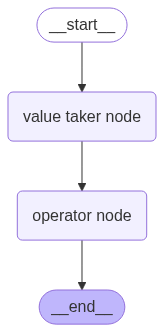

In [32]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [34]:
answer2 = app2.invoke({'values': [1,2,3],'operation':"*",'name':"Dhruv"})
answer2['result']

Hi, Dhruv, your values are: [1, 2, 3].


'Hi, Dhruv, your result after the operation is: 6.'